---
# **1. Instalación de bibliotecas**

---

In [ ]:
!pip install fuzzywuzzy
!pip install mplcursors
!pip install pandas plotly
!pip install selenium
!pip install python-docx
!pip install python-Levenshtein
!pip install plotly



---
# **2. Importación de librerias**

---

In [301]:
# Importar bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import pandas as pd
import cufflinks as cf
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import random

# Importar Sub - Bibliotecas

from fuzzywuzzy import fuzz
from tabulate import tabulate
from scipy.stats import rankdata
from IPython.display import display,HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

cf.set_config_file(sharing='public',theme='white',offline=True)
cf.set_config_file(sharing='public',theme='white',offline=True) # write cf.getThemes() to find all themes available


---
# **3. Marco de datos**

---

In [302]:

# Importar el archivo CSV
df_sales = pd.read_excel("/content/SP.xlsx")

# Imprime las primeras filas del DataFrame
df_sales.head()



Identificador  Peso_Producto Contenido_de_Grasa  Visibilidad_Producto  \
0         FDA15           9.30            Low Fat                  0.02   
1         DRC01           5.92            Regular                  0.02   
2         FDN15          17.50            Low Fat                  0.02   
3         FDX07          19.20            Regular                  0.00   
4         NCD19           8.93            Low Fat                  0.00   

                Producto  Variacion_Producto Identificador_Local  \
0                  Dairy          2498092.00              OUT049   
1            Soft Drinks           482692.00              OUT018   
2                   Meat           141618.00              OUT049   
3  Fruits and Vegetables           182095.00              OUT010   
4              Household           538614.00              OUT013   

   Anio_Establecimiento_Local Tamaño_Outlet ID_Outlet        Outlet_Tipo  \
0                        1999        Medium    Tier 1  Supermarket Type1   
1                        2009        Medium    Tier 3  Supermarket Type2   
2                        1999        Medium    Tier 1  Supermarket Type1   
3                        1998           NaN    Tier 3      Grocery Store   
4                        1987          High    Tier 3  Supermarket Type1   

      Ventas  
0 3735138.00  
1 4434228.00  
2    2097.27  
3     732.38  
4 9947052.00

---
# **4. Análisis exploratorio**

---


### 4.1  Estructura de la Matriz

In [303]:
df_sales.shape
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("El DataFrame tiene", df_sales.shape[0], "filas y", df_sales.shape[1], "columnas.")


Respuesta:
El DataFrame tiene 8523 filas y 12 columnas.


---------------------------------------------------------------------

### 4.2  Identificación Dtype por variable

In [308]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df_sales.info()



Respuesta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identificador               8523 non-null   object 
 1   Peso_Producto               7060 non-null   float64
 2   Contenido_de_Grasa          8523 non-null   object 
 3   Visibilidad_Producto        8523 non-null   float64
 4   Producto                    8523 non-null   object 
 5   Variacion_Producto          8523 non-null   float64
 6   Identificador_Local         8523 non-null   object 
 7   Anio_Establecimiento_Local  8523 non-null   int64  
 8   Tamaño_Outlet               6113 non-null   object 
 9   ID_Outlet                   8523 non-null   object 
 10  Outlet_Tipo                 8523 non-null   object 
 11  Ventas                      8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


---------------------------------------------------------------------

### 4.3  Clasifiación de variables y actualización nombres de columnas

In [309]:
# Definir un diccionario con los nuevos nombres de columnas
new_names = {
    "Item_Identifier": "Identificador",
    "Item_Weight": "Peso_Producto",
    "Item_Visibility": "Visibilidad_Producto",
    "Item_MRP": "Variacion_Producto",
    "Outlet_Establishment_Year": "Anio_Establecimiento_Local",
    "Item_Outlet_Sales": "Ventas",
    "Item_Fat_Content": "Contenido_de_Grasa",
    "Item_Type": "Producto",
    "Outlet_Identifier": "Identificador_Local",
    "Outlet_Size": "Tamaño_Outlet",
    "Outlet_Location_Type": "ID_Outlet",
    "Outlet_Type": "Outlet_Tipo"
}

# Reemplazar valores
df_sales = df_sales.rename(columns=new_names)

# Guardar
df_sales.to_excel("/content/SP.xlsx", index=False)

---------------------------------------------------------------------

### 4.4  Punto de Control

In [310]:
# Generar una copia del DataFrame con otro nombre
df_S1_copy = df_sales.copy()
# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_S1.to_excel("/content/SP_S1.xlsx", index=False)

### 4.5  Identificación de duplicados - Var. Categoricas


VARIABLE: Contenido de Grasa




In [311]:
# Importar el archivo CSV
df_S1 = pd.read_excel("/content/SP_S1.xlsx")

# Convertir todos los nombres a minúsculas para compararlos
df_S1['Contenido_de_Grasa'] = df_S1['Contenido_de_Grasa'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_S1['Contenido_de_Grasa'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 80:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

print("\033[43m\033[30m\033[1mVERIFICADO\033[0m")


VERIFICADO


---------------------------------------------------------------------

VARIABLE: Producto

In [312]:
# VARIABLE "Producto"

# Convertir todos los nombres a minúsculas para compararlos
df_S1['Producto'] = df_S1['Producto'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_S1['Producto'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

print("\033[43m\033[30m\033[1mVERIFICADO\033[0m")

VERIFICADO


---------------------------------------------------------------------

VARIABLE: Identificador Local

In [313]:
# VARIABLE "Identificador Local"

# Convertir todos los nombres a minúsculas para compararlos
df_S1['Identificador_Local'] = df_S1['Identificador_Local'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_S1['Identificador_Local'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

print("\033[43m\033[30m\033[1mVERIFICADO\033[0m")

VERIFICADO


---------------------------------------------------------------------

VARIABLE: Tamaño Outlet

In [314]:
# VARIABLE "Tamaño Outlet"

# Convertir todos los nombres a minúsculas para compararlos
df_S1['Tamaño_Outlet'] = df_S1['Tamaño_Outlet'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_S1['Tamaño_Outlet'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

print("\033[43m\033[30m\033[1mVERIFICADO\033[0m")

VERIFICADO


---------------------------------------------------------------------

VARIABLE: Tipo Outlet

In [315]:
# VARIABLE "Outlet Tipo"

# Convertir todos los nombres a minúsculas para compararlos
df_S1['Outlet_Tipo'] = df_S1['Outlet_Tipo'].astype(str).str.lower()

# Obtener una lista de nombres únicos
nombres_unicos = df_S1['Outlet_Tipo'].unique()

# Crear un diccionario para almacenar nombres parecidos
nombres_parecidos = {}

# Comparar cada par de nombres únicos y guardar los nombres parecidos
for i, nombre1 in enumerate(nombres_unicos):
    for nombre2 in nombres_unicos[i+1:]:
        similitud = fuzz.token_sort_ratio(nombre1, nombre2)
        if similitud > 90:
            if nombre1 in nombres_parecidos:
                nombres_parecidos[nombre1].append(nombre2)
            else:
                nombres_parecidos[nombre1] = [nombre2]

# Ordenar los nombres alfabéticamente
nombres_unicos_ordenados = sorted(nombres_unicos)

print("\033[43m\033[30m\033[1mVERIFICADO\033[0m")

VERIFICADO


---------------------------------------------------------------------

### 4.6  Identificación de celdas null

In [317]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df_S1.isnull().sum()


Respuesta:


Identificador                    0
Peso_Producto                 1463
Contenido_de_Grasa               0
Visibilidad_Producto             0
Producto                         0
Variacion_Producto               0
Identificador_Local              0
Anio_Establecimiento_Local       0
Tamaño_Outlet                    0
ID_Outlet                        0
Outlet_Tipo                      0
Ventas                           0
dtype: int64

---------------------------------------------------------------------

### 4.7  Identificación formato valores numéricos

Puntos y comas: Identificar si hay puntos y/o comas en los valores numerico

In [319]:
# Seleccionar las columnas que se desean analizar
columnas = ['Peso_Producto', 'Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local', 'Ventas']

# Iterar por cada columna
for col in columnas:
    # Seleccionar la columna
    columna = df_S1[col]

    # Contador de comas y puntos
    contador_comas = 0
    contador_puntos = 0

    # Iterar por cada fila de la columna
    for valor in columna:
        # Verificar si el valor es numérico
        if isinstance(valor, (int, float)):
            # Convertir el valor a una cadena de caracteres
            valor_str = str(valor)
            # Verificar si contiene comas o puntos
            if ',' in valor_str:
                # Contar la cantidad de comas que contiene
                contador_comas += valor_str.count(',')
            if '.' in valor_str:
                # Contar la cantidad de puntos que contiene
                contador_puntos += valor_str.count('.')
    
    # Imprimir el resultado para la columna actual
    print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
    print("La cantidad de comas en la columna \"" + col + "\" es: {}".format(contador_comas))
    print("La cantidad de puntos en la columna \"" + col + "\" es: {}".format(contador_puntos))




Respuesta:
La cantidad de comas en la columna "Peso_Producto" es: 0
La cantidad de puntos en la columna "Peso_Producto" es: 7060
Respuesta:
La cantidad de comas en la columna "Visibilidad_Producto" es: 0
La cantidad de puntos en la columna "Visibilidad_Producto" es: 8523
Respuesta:
La cantidad de comas en la columna "Variacion_Producto" es: 0
La cantidad de puntos en la columna "Variacion_Producto" es: 8523
Respuesta:
La cantidad de comas en la columna "Anio_Establecimiento_Local" es: 0
La cantidad de puntos en la columna "Anio_Establecimiento_Local" es: 0
Respuesta:
La cantidad de comas en la columna "Ventas" es: 0
La cantidad de puntos en la columna "Ventas" es: 8523


Texto: Identificar si str entre valores numericos

In [320]:
import math

# Seleccionar las columnas numéricas que se desean analizar
columnas_num = ['Peso_Producto', 'Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local', 'Ventas']

# Crear un diccionario para almacenar los resultados
conteo = {}

# Iterar por cada columna
for col in columnas_num:
    # Seleccionar la columna
    columna = df_S1[col]
    
    # Contador de valores
    total = len(columna)
    contador_nan = 0
    contador_float = 0
    contador_int = 0
    
    # Iterar por cada fila de la columna
    for valor in columna:
        # Verificar el tipo de dato del valor
        if isinstance(valor, float):
            if math.isnan(valor):
                contador_nan += 1
            else:
                contador_float += 1
        elif isinstance(valor, int):
            contador_int += 1
    
    # Almacenar los resultados en el diccionario
    conteo[col] = [total, contador_nan, contador_float, contador_int]

# Convertir el diccionario en un dataframe
df_conteo = pd.DataFrame.from_dict(conteo, orient='index', columns=["Total", "NaN", "Floats", "Ints"])

# Imprimir el dataframe
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(df_conteo)


Respuesta:
                            Total   NaN  Floats  Ints
Peso_Producto                8523  1463    7060     0
Visibilidad_Producto         8523     0    8523     0
Variacion_Producto           8523     0    8523     0
Anio_Establecimiento_Local   8523     0       0  8523
Ventas                       8523     0    8523     0


In [321]:
for col in columnas_num:
    if df_S1[col].apply(lambda x: isinstance(x, str)).any():
        print(f"Hay texto en la columna {col}")
    else:
        print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
        print(f"No hay texto en la columna {col}")



Respuesta:
No hay texto en la columna Peso_Producto
Respuesta:
No hay texto en la columna Visibilidad_Producto
Respuesta:
No hay texto en la columna Variacion_Producto
Respuesta:
No hay texto en la columna Anio_Establecimiento_Local
Respuesta:
No hay texto en la columna Ventas


### 4.8  Punto de Control

In [322]:
# Generar una copia del DataFrame con otro nombre
df_S2_copy = df_sales.copy()
# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_S2_copy.to_excel("/content/SP_S2.xlsx", index=False)

---
# **5. Imputación de variables**

---

### 5.1  Imputación de bases de datos

Imputación sobre la Variable Contenido de Grasa

NOTA:

1.   Cambio 56 \celdas "LF" por "Low Fat" y"reg" por "Regular"

In [323]:
# Importar el archivo CSV
df_S2 = pd.read_excel("/content/SP_S2.xlsx")

# Cambiar los valores "LF" por "Low Fat" y "reg" por "Regular" en la columna "Contenido de Grasa"
df_S2["Contenido_de_Grasa"] = df_S2["Contenido_de_Grasa"].replace({"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"})

# Guardar
df_S2.to_excel("/content/SP_S2.xlsx", index=False)


In [324]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
unique_productos = df_S2["Contenido_de_Grasa"].unique()
print(unique_productos)


Respuesta:
['Low Fat' 'Regular']


---------------------------------------------------------------------

Imputación sobre la Variable Peso Producto

In [325]:
# Calcular el peso promedio por identificador
peso_promedio_por_identificador = df_S2.groupby("Identificador")["Peso_Producto"].mean()

# Calcular el peso promedio general de toda la columna "Peso_Producto"
peso_promedio_general = df_S2["Peso_Producto"].mean()

# Verificar si el identificador tiene al menos un valor no nulo en la columna "Peso_Producto"
identificadores_con_valores = df_S2.groupby("Identificador")["Peso_Producto"].apply(lambda x: x.notnull().any())

# Llenar los valores nulos de la columna "Peso_Producto"
df_S2["Peso_Producto"] = df_S2.apply(lambda row: peso_promedio_por_identificador[row["Identificador"]] if row["Identificador"] in peso_promedio_por_identificador.index and identificadores_con_valores[row["Identificador"]] else peso_promedio_general if pd.isnull(row["Peso_Producto"]) else row["Peso_Producto"], axis=1)


# Guardar
df_S2.to_excel("/content/SP_S2.xlsx", index=False)



---------------------------------------------------------------------

Imputación sobre la Variable Tamaño Outlet

In [326]:
# Calcular el Tamaño Outlet por Anio_Establecimiento_Local
tamaño_año = df_S2.groupby("Anio_Establecimiento_Local")["Tamaño_Outlet"].apply(lambda x: x.mode()[0] if x.notnull().any() else df_S2["Tamaño_Outlet"].mode()[0])

# Llenar los valores nulos de la columna "Tamaño Outlet"
df_S2["Tamaño_Outlet"] = df_S2.apply(lambda row: tamaño_año[row["Anio_Establecimiento_Local"]] if pd.isna(row["Tamaño_Outlet"]) else row["Tamaño_Outlet"], axis=1)

# Verificar si en la columna "Identificador" le corresponde un valor en la columna "Peso_Producto"
identificadores_con_valores = df_S2.groupby("Anio_Establecimiento_Local")["Tamaño_Outlet"].apply(lambda x: x.notnull().any())

# Llenar los valores nulos de la columna "Peso_Producto"
df_S2["Tamaño_Outlet"] = df_S2.apply(lambda row: row["Tamaño_Outlet"] if pd.notna(row["Tamaño_Outlet"]) else df_S2[df_S2["Anio_Establecimiento_Local"] == row["Anio_Establecimiento_Local"]]["Tamaño_Outlet"].iloc[0] if identificadores_con_valores[row["Anio_Establecimiento_Local"]] else row["Tamaño_Outlet"], axis=1)

# Guardar
df_S2.to_excel("/content/SP_S2.xlsx", index=False)


---------------------------------------------------------------------

### 5.2  Base de Datos Resultante

In [327]:
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
df_S2.info()

Respuesta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identificador               8523 non-null   object 
 1   Peso_Producto               8523 non-null   float64
 2   Contenido_de_Grasa          8523 non-null   object 
 3   Visibilidad_Producto        8523 non-null   float64
 4   Producto                    8523 non-null   object 
 5   Variacion_Producto          8523 non-null   float64
 6   Identificador_Local         8523 non-null   object 
 7   Anio_Establecimiento_Local  8523 non-null   int64  
 8   Tamaño_Outlet               8523 non-null   object 
 9   ID_Outlet                   8523 non-null   object 
 10  Outlet_Tipo                 8523 non-null   object 
 11  Ventas                      8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


---
# **6. Análisis descriptivo**

---


### 6.1  Punto de Control de base de datos

In [328]:
# Generar una copia del DataFrame con otro nombre
df_S3_copy = df_S2.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_S3_copy.to_excel("/content/SP_S3.xlsx", index=False)


In [329]:
# Importar el archivo CSV
df_S3 = pd.read_excel("/content/SP_S3.xlsx")

---------------------------------------------------------------------

### 6.2  Análisis de medidas de tendencia central

NOTA:

1.   Las variables Item_Visibility, Item_MRP e Item_Outlet_Sales, presentan variaciones muy dispersas. Entre 4 y 7 desviaciones estandar de cada 10 analizadas se alejan del promedio. 
2.   Esto nos puede dar a entender que la dispersión de datos es alta, sin embargo,dado que son productos de diferentes caracteristicas se anota que este analisis se debe realizarse por item. Dado nuestro objetivo de analisis de ventas es necesario analizar la correlación de las variables para entender la varianza.

In [330]:

# Seleccionar solo las columnas numéricas
df_numeric = df_S3.select_dtypes(include=np.number)

# Calcular la desviación estándar y el promedio solo en las columnas numéricas
desv_std = df_numeric.std().tolist()
promedio = df_numeric.mean().tolist()

# Calcular el resultado y redondearlo a 2 decimales
resultado = [(a / b) * 100 for a, b in zip(desv_std, promedio)]
resultado = [round(x, 2) for x in resultado]

# Crear un DataFrame con el resultado y mostrarlo
tabla = pd.DataFrame({"Varianza (%)": resultado}, index=df_numeric.columns)
print(tabla)


                            Varianza (%)
Peso_Producto                     230.30
Visibilidad_Producto               78.02
Variacion_Producto                 65.56
Anio_Establecimiento_Local          0.42
Ventas                            113.44


---------------------------------------------------------------------

### 6.3  Visualización de dispersión de datos

NOTA:

1.   Clasificación de variables numericas y categoricas

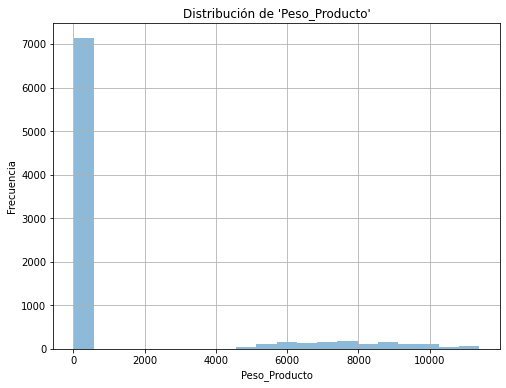

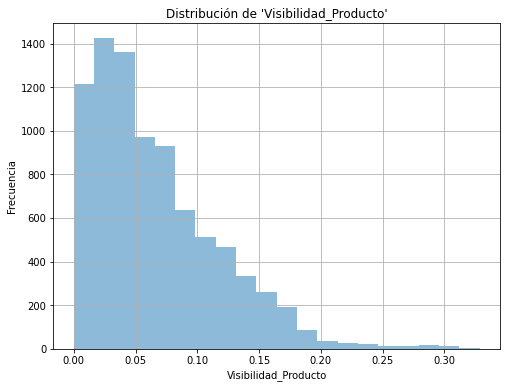

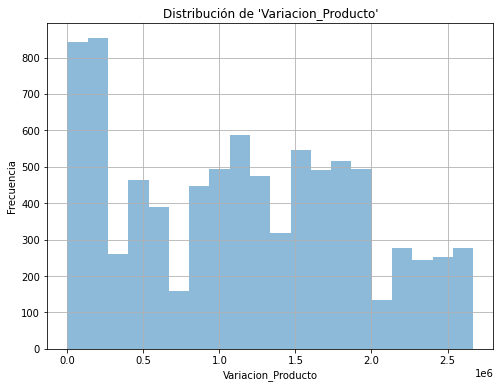

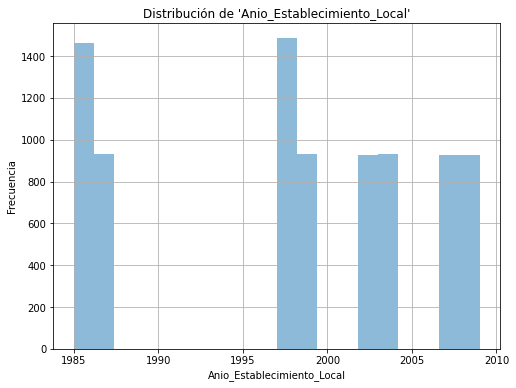

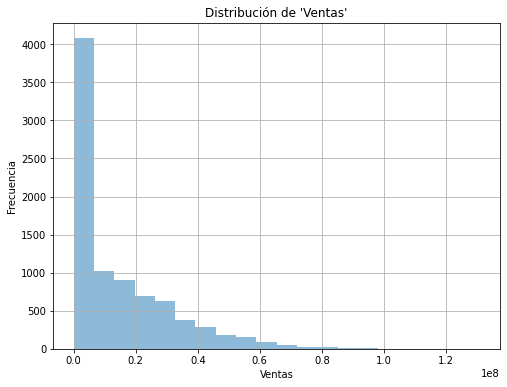

In [331]:

# Crear una función para describir características numéricas con histogramas
def desc_num_feature(df, feature_name):
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)
    df[feature_name].hist(bins=20, alpha=0.5, ax=ax)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Frecuencia")
    ax.set_title(f"Distribución de '{feature_name}'")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()

# Iterar a través de la lista de nombres de características numéricas y llamar a la función desc_num_feature para cada una
numerical_features = ['Peso_Producto', 'Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local', 'Ventas']
for feature_name in numerical_features:
    desc_num_feature(df_S3, feature_name)




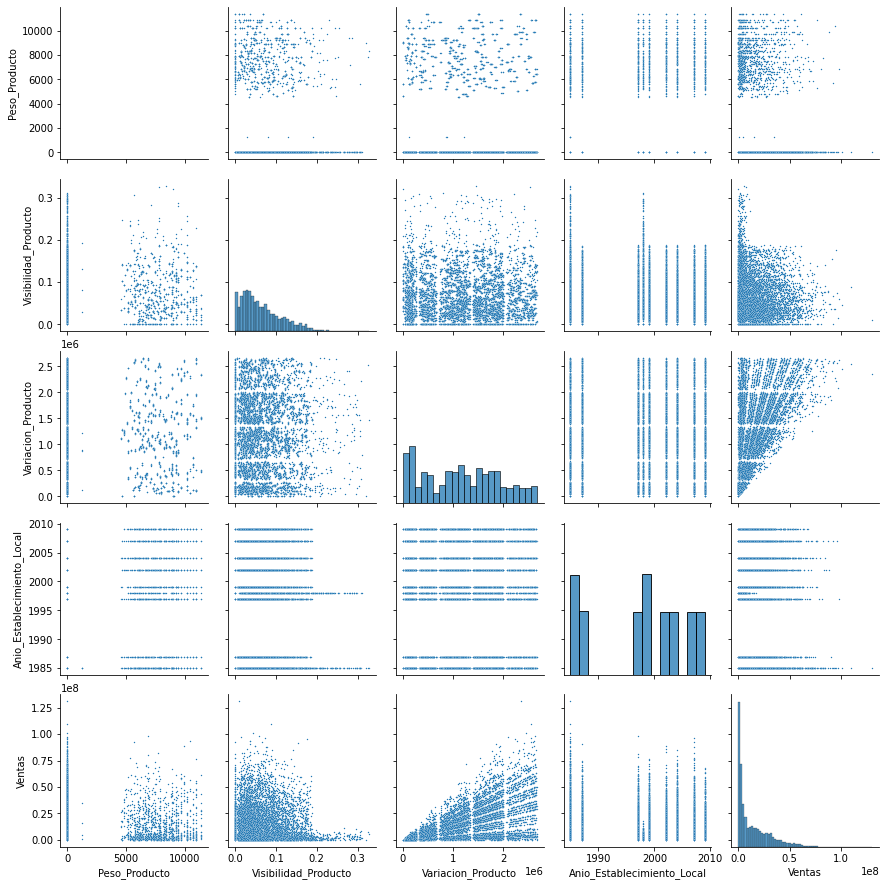

In [332]:
sns.pairplot(df_S3[numerical_features], plot_kws={"s": 2})
plt.show()


---------------------------------------------------------------------

### 6.4  Correlación

NOTA:

1.   Explica para efectos de análisis estrategico cual de las variables influencia con su corelación directa o inversa los resultados esperados, que para objeto de este análisis se prioriza las ventas. Así se puede ver que hay 2 variables tiene relación media y directa (r=0.57). El nivel de ventas (Item_Outlet_Sales) varia en la medida que se gestione adecuadamente Precio máximo de venta al público (precio de catálogo) del producto (Item_MRP).

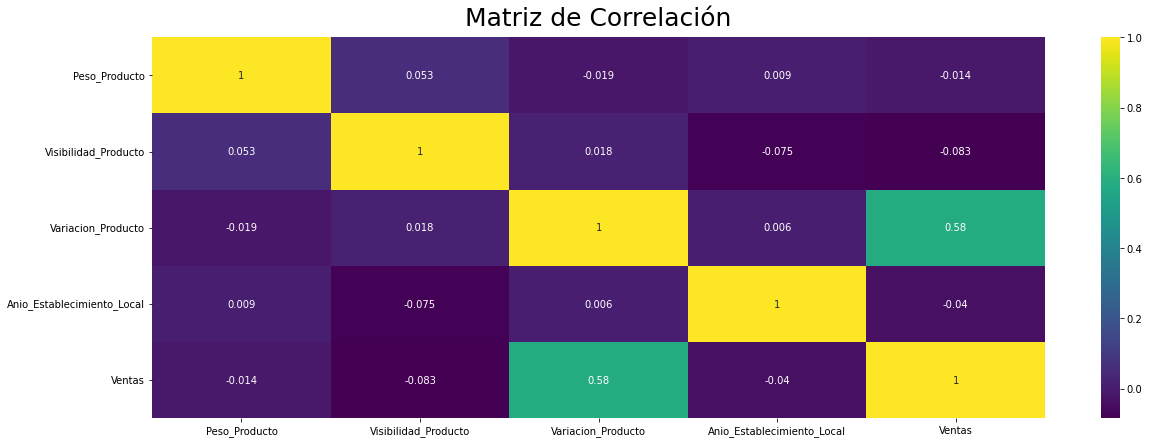

In [333]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df_S3.corr(), cmap="viridis", annot=True)
heatmap.set_title("Matriz de Correlación", fontdict={"fontsize": 25}, pad=12)
plt.show()


---------------------------------------------------------------------

### 6.5  Distribución

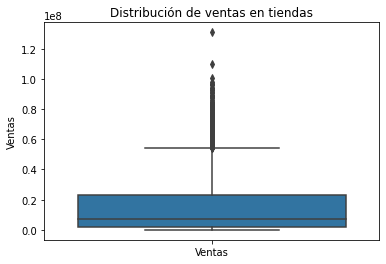

In [334]:
# Crear el gráfico de boxplot
sns.boxplot(data=df_S3[['Ventas']])
plt.title('Distribución de ventas en tiendas')
plt.ylabel('Ventas')
plt.show()



---------------------------------------------------------------------

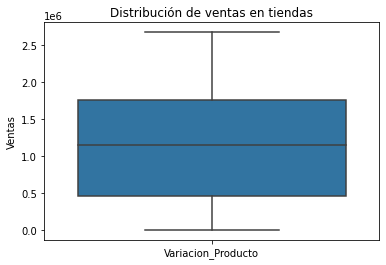

In [335]:
# Crear el gráfico de boxplot
sns.boxplot(data=df_S3[['Variacion_Producto']])
plt.title('Distribución de ventas en tiendas')
plt.ylabel('Ventas')
plt.show()

---------------------------------------------------------------------

### 6.6  Análisis entre variables

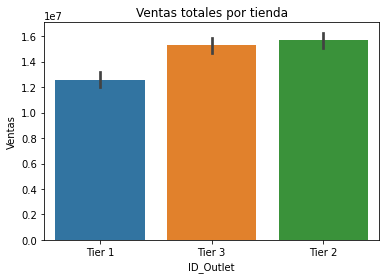

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="ID_Outlet", y="Ventas", data=df_S3)
plt.title("Ventas totales por tienda")
plt.show()



---------------------------------------------------------------------

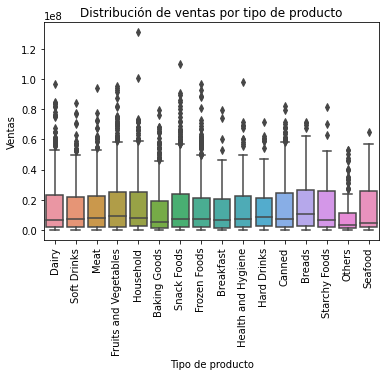

In [337]:
import seaborn as sns

sns.boxplot(x="Producto", y="Ventas", data=df_S3)
plt.title("Distribución de ventas por tipo de producto")
plt.xlabel("Tipo de producto")
plt.ylabel("Ventas")
plt.xticks(rotation=90)
plt.show()


---
# **7. Análisis para clientes**

---

### 7.1  Punto de Control

In [338]:
# Generar una copia del DataFrame con otro nombre
df_S4_copy = df_S3.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_S4_copy.to_excel("/content/SP_S4.xlsx", index=False)

In [339]:
# Importar el archivo CSV
df_S4 = pd.read_excel("/content/SP_S4.xlsx")


---------------------------------------------------------------------

### 7.2  Ventas por producto

In [340]:
# Eliminar filas que contienen valores nulos
df_S4 = df_S4.dropna()

# Eliminar filas duplicadas según las columnas 'Anio_Establecimiento_Local' e 'Producto'
df_S4 = df_S4[~df_S4.duplicated(subset=['Anio_Establecimiento_Local', 'Producto'])]

# Crear tabla pivote de las ventas por Anio_Establecimiento_Local y por tipo de producto
df_S4 = df_S4.pivot(index='Anio_Establecimiento_Local', columns='Producto', values='Ventas')

# Seleccionar las columnas que se desean graficar
df_S4 = df_S4[['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 
               'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 
               'Meat', 'Others', 'Seafood', 'Snack Foods', 'Soft Drinks', 'Starchy Foods']]

# Redondear los valores a dos decimales
df_S4 = df_S4.round(2)

# Crear figura
fig = go.Figure()

# Definir las variables del radar chart
variables = df_S4.columns

# Agregar cada variable como un objeto go.Scatterpolar a la figura
for i in range(len(df_S4)):
    fig.add_trace(go.Scatterpolar(
        r=df_S4.iloc[i].values,
        theta=variables,
        fill='toself',
        name=str(df_S4.index[i])
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, df_S4.max().max()]
        )
    ),
    showlegend=True,
    height=800,  # Ajustar el alto a 800 pixels
    width=800    # Ajustar el ancho a 800 pixels
)


# Mostrar la figura
pyo.plot(fig, filename='radar_chart.html')




'radar_chart.html'

In [341]:
from IPython.display import HTML
HTML(filename='radar_chart.html')


---
# **8. Actividades de P1-Parte 5**

---

### 8.1 Eliminar columnas

In [342]:
# Importar el archivo CSV
df_S4 = pd.read_excel("/content/SP_S4.xlsx")

# Eliminar columnas no necesarias
df_S4 = df_S4.drop(["Producto",'Identificador', 'Tamaño_Outlet', 'ID_Outlet', 'Peso_Producto', 'Contenido_de_Grasa',"Outlet_Tipo"], axis=1)

# Guardar
df_S4.to_excel("/content/SP_S4.xlsx", index=False)



In [343]:
# Importar el archivo CSV
df_S4 = pd.read_excel("/content/SP_S4.xlsx")

# Imprime las primeras filas del DataFrame
df_S4.head()

Visibilidad_Producto  Variacion_Producto Identificador_Local  \
0                  0.02          2498092.00              OUT049   
1                  0.02           482692.00              OUT018   
2                  0.02           141618.00              OUT049   
3                  0.00           182095.00              OUT010   
4                  0.00           538614.00              OUT013   

   Anio_Establecimiento_Local     Ventas  
0                        1999 3735138.00  
1                        2009 4434228.00  
2                        1999    2097.27  
3                        1998     732.38  
4                        1987 9947052.00

### 8.2 Categorizar variables

In [344]:
import pandas as pd

# Leer la base de datos de Excel
df_S4 = pd.read_excel("/content/SP_S4.xlsx")

# Eliminar las letras "OUT" de la columna "Identificador_Local"
df_S4["Identificador_Local"] = df_S4["Identificador_Local"].str.replace("OUT", "")

# Cambiar el tipo de datos de la columna "Identificador_Local" de "object" a "int64"
df_S4["Identificador_Local"] = df_S4["Identificador_Local"].astype("int64")

# Eliminar filas con valores no numéricos en la columna "Identificador_Local"
df_S4 = df_S4[pd.to_numeric(df_S4["Identificador_Local"], errors='coerce').notnull()]

# Convertir la columna "Identificador_Local" de "object" a "int64"
df_S4["Identificador_Local"] = df_S4["Identificador_Local"].astype("int64")

# Guardar los cambios en la base de datos de Excel
df_S4.to_excel("/content/SP_S4.xlsx", index=False)


In [345]:
# Seleccionar columnas categóricas
cat_cols = df_S4.select_dtypes(include=['object']).columns.tolist()

# Seleccionar columnas numéricas
num_cols = df_S4.select_dtypes(include=['float', 'int']).columns.tolist()

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir las columnas seleccionadas
print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)


Respuesta:
Columnas categóricas: []
Columnas numéricas: ['Visibilidad_Producto', 'Variacion_Producto', 'Identificador_Local', 'Anio_Establecimiento_Local', 'Ventas']


### 8.3  Punto de Control

In [346]:
# Generar una copia del DataFrame con otro nombre
df_S5_copy = df_S4.copy()

# Guardar el DataFrame modificado en un archivo CSV con un nuevo nombre y extensión
df_S5_copy.to_excel("/content/SP_S5.xlsx", index=False)

### 8.4  Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" como el objetivo y el resto de las variables relevantes como el matriz de características. 

In [352]:
# Importar el archivo CSV
df_S5 = pd.read_excel("/content/SP_S5.xlsx")

# Agregar los nombres de las columnas
df_S5.columns = ['Visibilidad_Producto', 
                 'Variacion_Producto', 
                 'Anio_Establecimiento_Local', 
                 "Identificador_Local",
                 "Ventas"
                 ]

# Convertir los valores de las columnas a numéricos
columnas_numericas = ['Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local', 'Ventas']
df_S5[columnas_numericas] = df_S5[columnas_numericas].apply(pd.to_numeric)

# Agregar dos decimales a los valores numéricos
pd.options.display.float_format = '{:.2f}'.format      

# Separar los datos en una matriz de características (X) y un vector objetivo (y)
X = df_S5.drop(['Ventas'], axis=1)  # Se eliminan las columnas que no son el vector objetivo
y = df_S5['Ventas']

# Imprimir la matriz de características (X) en formato de tabla
print("\n\033[43m\033[30m\033[1mMatriz de características (X):\033[0m")
print(X.head().to_string(index=False, header=True))

# Imprimir el vector objetivo (y) en formato de tabla
print("\n\033[43m\033[30m\033[1mVector objetivo (y):\033[0m")
print(y.head().to_string(index=False, header=True))

# Guardar
df_S5.to_excel("/content/SP_S5.xlsx", index=False)


Matriz de características (X):
 Visibilidad_Producto  Variacion_Producto  Anio_Establecimiento_Local  Identificador_Local
                 0.02          2498092.00                          49                 1999
                 0.02           482692.00                          18                 2009
                 0.02           141618.00                          49                 1999
                 0.00           182095.00                          10                 1998
                 0.00           538614.00                          13                 1987

Vector objetivo (y):
3735138.00
4434228.00
   2097.27
    732.38
9947052.00


### 8.5  Crear un train test split en los datos. Utilicen un número aleatorio 1875 por coherencia.

In [276]:
# Definir número aleatorio
numero_aleatorio = random.randint(1, 8523)
#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print(numero_aleatorio)

Respuesta:
1875


In [353]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1875)

#Imprimir
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")

# Imprimir los conjuntos de entrenamiento y prueba en formato de tabla
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("Conjunto de entrenamiento:")
print(pd.concat([X_train, y_train], axis=1).head().to_string(index=False))

print("Conjunto de prueba:")
print(pd.concat([X_test, y_test], axis=1).head().to_string(index=False))

# Guardar
df_S5.to_excel("/content/SP_S5.xlsx", index=False)

Respuesta:
Conjunto de entrenamiento:
 Visibilidad_Producto  Variacion_Producto  Anio_Establecimiento_Local  Identificador_Local      Ventas
                 0.10           546956.00                          13                 1987  1637868.00
                 0.03          1641526.00                          27                 1985 29601468.00
                 0.22          1127886.00                          19                 1985  2223772.00
                 0.04           573562.00                          17                 2007 10073554.00
                 0.17           352874.00                          17                 2007  3881614.00
Conjunto de prueba:
 Visibilidad_Producto  Variacion_Producto  Anio_Establecimiento_Local  Identificador_Local      Ventas
                 0.06          1545656.00                          13                 1987 24714496.00
                 0.09          1259704.00                          13                 1987  1877556.00
               

### 8.6  Utilizar un ColumnTransformer para emparejar la transformación al tipo de columnaTransformar los datos y mostrar los arrays de NumPy resultantes

In [354]:

# Importar el archivo CSV
df_S5 = pd.read_excel("/content/SP_S5.xlsx")

# Definir X_train y X_test
X = df_S5[['Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local']]
y = df_S5['Ventas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Definir las transformaciones
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Definir las columnas que serán transformadas
num_features = ['Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local']

# Definir el preprocesamiento
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features)])

# Ajustar el preprocesamiento en el conjunto de entrenamiento
preprocessor.fit(X_train)

# Transformar los conjuntos de entrenamiento y prueba
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convertir a DataFrames de pandas
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_features)

# Mostrar los DataFrames resultantes
print("\033[43m\033[30m\033[1mRespuesta:\033[0m")
print("Conjunto de entrenamiento transformado (forma):", X_train_transformed.shape)
print(X_train_transformed.head())
print("Conjunto de prueba transformado (forma):", X_test_transformed.shape)
print(X_test_transformed.head())


Respuesta:
Conjunto de entrenamiento transformado (forma): (6818, 3)
   Visibilidad_Producto  Variacion_Producto  Anio_Establecimiento_Local
0                 -1.12                0.11                       -0.16
1                 -1.00               -0.84                        1.13
2                  1.08               -1.44                        1.20
3                  1.55                1.74                       -0.73
4                 -0.33                1.04                        0.41
Conjunto de prueba transformado (forma): (1705, 3)
   Visibilidad_Producto  Variacion_Producto  Anio_Establecimiento_Local
0                  0.46                0.58                        1.13
1                 -1.10               -1.44                       -0.16
2                 -0.94                0.19                       -0.88
3                 -1.29                0.37                       -0.88
4                 -0.33                1.05                       -1.16


### 8.7  Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.

In [355]:
# Importar el archivo CSV
df_S5 = pd.read_excel("/content/SP_S5.xlsx")

# Separar características y variable objetivo
X = df_S5.drop(['Visibilidad_Producto', 'Variacion_Producto', 'Anio_Establecimiento_Local'], axis=1)

y = df_S5["Ventas"]

# Definir transformaciones para cada tipo de columna
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Seleccionar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Crear preprocesador para aplicar transformaciones a cada tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definir pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Dividir conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar pipeline
pipeline.fit(X_train, y_train)

# Evaluar rendimiento del modelo en conjunto de prueba
score = pipeline.score(X_test, y_test)
print(f'R2 score: {score}')


R2 score: 1.0
